>주어진 데이터를 정해진 범주(category)에 따라 분류
>   >예측 결과가 숫자가 아닐때

> 분류 모델

#### 선형 회귀 방식을 분류에 적용한 알고리즘,   
데이터가 어떤 범주에 속할 확률을 0~1 사이의 값으로 예측,   
더 높은 범주에 속하는 쪽으로 분류.
```
범주 : True/False, Yes/NO, 합격/불합격, ...
(예) 스팸 메일, 은행 대출, 악성 여부, 고객의 제품 구매 의사, ...
```


# 4. Logistic Regression

### 공부 시간에 따른 자격증 시험 합격 가능성

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv('LogisticRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### 데이터 분리

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 로지스틱 회귀 모델

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

###  6시간 공부했을 때 예측?

In [11]:
classifier.predict([[6]])

array([1], dtype=int64)

In [13]:
classifier.predict_proba([[6]])
# 불합격 확률 14%, 합격 확률 85%

array([[0.141483, 0.858517]])

### 4시간 공부했을때 예측?

In [12]:
classifier.predict([[4]])
# 불합격 예측

array([0], dtype=int64)

In [15]:
classifier.predict_proba([[4]])
# 불합격 확률 62%, 합격 확률 37%

array([[0.62497682, 0.37502318]])

### 분류 결과 예측 (테스트 세트)

In [16]:
y_pred = classifier.predict(X_test)
# 예측 값
y_pred

array([1, 0, 1, 1], dtype=int64)

In [17]:
# 실제 값(테스트 세트)
y_test

array([1, 0, 1, 0], dtype=int64)

In [18]:
# 공부시간 (테스트 세트)
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [19]:
# 모델 평가
classifier.score(X_test, y_test)
# 전체 테스트 세트 4개 중 분류 예측을 올바르게 맞힌 개수 3개

0.75

### 데이터 시각화(훈련 세트)

In [20]:
X_range = np.arange(min(X), max(X), 0.1)
X_range

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [22]:
# y = mx + b
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))
p

array([[0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
        0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
        0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
        0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
        0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
        0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
        0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
        0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
        0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
        0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
        0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
        0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
        0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
        0.95072949, 0.95587461, 0.96050477, 0.96466704, 0.96840509,
        0.97175925, 0.97476661, 0.97746114, 0.97

In [23]:
p.shape

(1, 95)

In [24]:
X_range.shape

(95,)

In [25]:
# 1차원 배열 형태로 변경
p = p.reshape(-1)
p.shape

(95,)

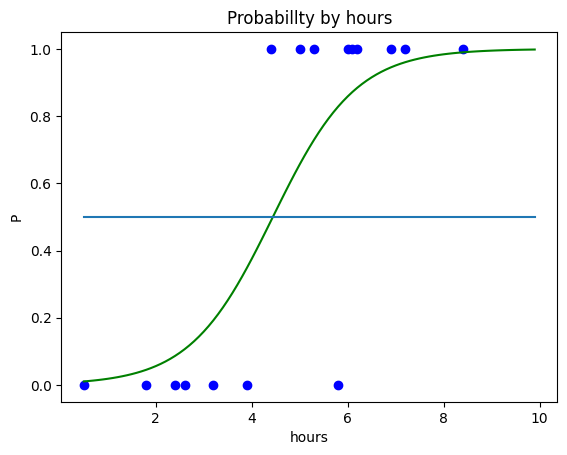

In [26]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, p, color='green')
# X_range 개수만큼 0.5로 가득찬 배열 만들기
plt.plot(X_range, np.full(len(X_range), 0.5))
plt.title('Probabillty by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

### 테스트 세트

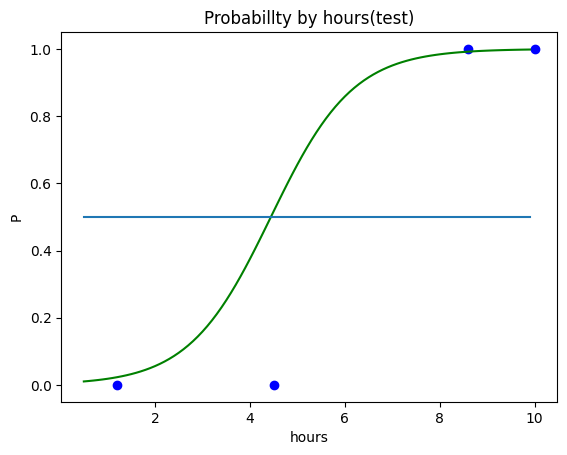

In [29]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
# X_range 개수만큼 0.5로 가득찬 배열 만들기
plt.plot(X_range, np.full(len(X_range), 0.5))
plt.title('Probabillty by hours(test)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

In [28]:
# 4.5 시간 공부했을 때 확률( 모델에서는 51% 확률로 합격 예측, 실제로는 불합격)
classifier.predict_proba([[4.5]])

array([[0.48307854, 0.51692146]])

## 혼돈 행렬

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 1],
       [0, 2]], dtype=int64)